# Projet d'Analyse de Données — DatasetComp.xlsx

In [19]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


In [34]:

df = pd.read_csv('datasetComp.csv', sep=';')


# -------------------------------------------
# 3. Exploratory Data Analysis (EDA)
# ------------------------------------------

In [35]:
# Vérification rapide de la structure
print("Dimensions :", df.shape)
print(df.dtypes)
display(df.head())

display(df.columns)

Dimensions : (1262, 6)
Indicator      object
Year          float64
Region         object
Zone           object
Percentage     object
Real          float64
dtype: object


,Indicator,Year,Region,Zone,Percentage,Real
0,Population covered by a mobile-cellular networ...,2015.0,World,Rural,"88,9",NaN
1,Population covered by a mobile-cellular networ...,2015.0,Low-income,Rural,"67,1",NaN
2,Population covered by a mobile-cellular networ...,2015.0,Lower-middle-income,Rural,"90,1",NaN
3,Population covered by a mobile-cellular networ...,2015.0,Upper-middle-income,Rural,"91,2",NaN
4,Population covered by a mobile-cellular networ...,2015.0,High-income,Rural,"92,4",NaN


Index(['Indicator', 'Year', 'Region', 'Zone', 'Percentage', 'Real'], dtype='object')

In [ ]:
def clean_numeric(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value


# Affichage des premières lignes pour vérification
print("Aperçu des données :")
display(df.head())

# ### 2.2 Analyse préliminaire des données

# Informations générales sur le dataset
print("\nInformations sur le dataset :")
display(df.info())

# Description statistique des données numériques
print("\nStatistiques descriptives :")
display(df.describe())



Aperçu des données :


,Indicator,Year,Region,Zone,Percentage,Real
0,Population covered by a mobile-cellular networ...,2015.0,World,Rural,"88,9",NaN
1,Population covered by a mobile-cellular networ...,2015.0,Low-income,Rural,"67,1",NaN
2,Population covered by a mobile-cellular networ...,2015.0,Lower-middle-income,Rural,"90,1",NaN
3,Population covered by a mobile-cellular networ...,2015.0,Upper-middle-income,Rural,"91,2",NaN
4,Population covered by a mobile-cellular networ...,2015.0,High-income,Rural,"92,4",NaN



Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicator   1260 non-null   object 
 1   Year        1260 non-null   float64
 2   Region      1260 non-null   object 
 3   Zone        1260 non-null   object 
 4   Percentage  1260 non-null   object 
 5   Real        0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 59.3+ KB


None


Statistiques descriptives :


,Year,Real
count,1260.000000,0.0
mean,2019.500000,NaN
std,2.873422,NaN
min,2015.000000,NaN
25%,2017.000000,NaN
50%,2019.500000,NaN
75%,2022.000000,NaN
max,2024.000000,NaN



Valeurs manquantes par colonne :


Indicator        2
Year             2
Region           2
Zone             2
Percentage       2
Real          1262
dtype: int64

In [38]:
def clean_numeric(value):
	if isinstance(value, str):
		value = value.strip()
		if value.lower() in ['n/a', 'na', ' n/a ']:
			return np.nan
		try:
			return float(value.replace(',', '.'))
		except ValueError:
			return np.nan
	return value

df['Percentage'] = df['Percentage'].apply(clean_numeric)

In [40]:
display(df['Percentage'].head())
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())

0    88.9
1    67.1
2    90.1
3    91.2
4    92.4
Name: Percentage, dtype: float64


Valeurs manquantes par colonne :


Indicator        2
Year             2
Region           2
Zone             2
Percentage     243
Real          1262
dtype: int64

In [41]:
# 2.3 Traitement des valeurs manquantes dans la colonne 'Percentage'

# Vérification des valeurs manquantes avant le remplacement
null_values_before = df.isnull().sum()
n_missing_before = df['Percentage'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'Percentage' avant traitement: {n_missing_before}")

# Calcul des moyennes par Indicateur et Année
indicator_year_means = df.groupby(['Indicator', 'Year'])['Percentage'].transform('mean')

# Remplacement des valeurs manquantes par la moyenne de l'indicateur et de l'année correspondante
df['Percentage'].fillna(indicator_year_means, inplace=True)

# Si des valeurs restent manquantes (ex: si l'indicateur entier pour une année n'a pas de valeur),
# les remplacer par la moyenne globale
mean_value = df['Percentage'].mean()
df['Percentage'].fillna(mean_value, inplace=True)

# Vérification après remplacement
null_values_after = df.isnull().sum()
n_missing_after = df['Percentage'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'Percentage' après traitement: {n_missing_after}")
print(f"Moyenne globale utilisée pour les remplacements restants: {mean_value:.2f}")

# Créer un tableau pivot pour visualiser les données par région, zone et indicateur
pivot_df = df.pivot_table(index=['Region', 'Zone', 'Indicator'], 
                         columns='Year', 
                         values='Percentage')

# Afficher un aperçu du tableau pivot
print("\nTableau pivot des pourcentages par région, zone et indicateur:")
display(pivot_df.head())

Nombre de valeurs manquantes dans 'Percentage' avant traitement: 243
Nombre de valeurs manquantes dans 'Percentage' après traitement: 0
Moyenne globale utilisée pour les remplacements restants: 76.82

Tableau pivot des pourcentages par région, zone et indicateur:


C:\Users\Adrien\AppData\Local\Temp\ipykernel_37552\1576980057.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Percentage'].fillna(indicator_year_means, inplace=True)
C:\Users\Adrien\AppData\Local\Temp\ipykernel_37552\1576980057.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

Year                                                                2015.0  \
Region    Zone  Indicator                                                    
Africa    Rural Population covered by at least a 3G mobile netw...    29.7   
          Total Population covered by at least a 3G mobile netw...    49.6   
          Urban Population covered by at least a 3G mobile netw...    86.1   
Americas  Rural Population covered by at least a 3G mobile netw...    65.1   
          Total Population covered by at least a 3G mobile netw...    91.4   

Year                                                                2016.0  \
Region    Zone  Indicator                                                    
Africa    Rural Population covered by at least a 3G mobile netw...    37.4   
          Total Population covered by at least a 3G mobile netw...    57.5   
          Urban Population covered by at least a 3G mobile netw...    92.8   
Americas  Rural Population covered by at least a 3G mobile netw...    69.5   
          Total Population covered by at least a 3G mobile netw...    92.8   

Year                                                                2017.0  \
Region    Zone  Indicator                                                    
Africa    Rural Population covered by at least a 3G mobile netw...    42.0   
          Total Population covered by at least a 3G mobile netw...    62.6   
          Urban Population covered by at least a 3G mobile netw...    94.1   
Americas  Rural Population covered by at least a 3G mobile netw...    72.0   
          Total Population covered by at least a 3G mobile netw...    94.0   

Year                                                                2018.0  \
Region    Zone  Indicator                                                    
Africa    Rural Population covered by at least a 3G mobile netw...    53.1   
          Total Population covered by at least a 3G mobile netw...    70.3   
          Urban Population covered by at least a 3G mobile netw...    95.6   
Americas  Rural Population covered by at least a 3G mobile netw...    72.5   
          Total Population covered by at least a 3G mobile netw...    94.7   

Year                                                                2019.0  \
Region    Zone  Indicator                                                    
Africa    Rural Population covered by at least a 3G mobile netw...    59.1   
          Total Population covered by at least a 3G mobile netw...    73.7   
          Urban Population covered by at least a 3G mobile netw...    96.9   
Americas  Rural Population covered by at least a 3G mobile netw...    73.0   
          Total Population covered by at least a 3G mobile netw...    94.5   

Year                                                                2020.0  \
Region    Zone  Indicator                                                    
Africa    Rural Population covered by at least a 3G mobile netw...    59.2   
          Total Population covered by at least a 3G mobile netw...    75.9   
          Urban Population covered by at least a 3G mobile netw...    99.4   
Americas  Rural Population covered by at least a 3G mobile netw...    72.2   
          Total Population covered by at least a 3G mobile netw...    94.6   

Year                                                                2021.0  \
Region    Zone  Indicator                                                    
Africa    Rural Population covered by at least a 3G mobile netw...    64.2   
          Total Population covered by at least a 3G mobile netw...    79.1   
          Urban Population covered by at least a 3G mobile netw...    99.8   
Americas  Rural Population covered by at least a 3G mobile netw...    72.2   
          Total Population covered by at least a 3G mobile netw...    94.7   

Year                                                                2022.0  \
Region    Zone  Indicator                                                    
Africa    Rural

Valeurs manquantes avant imputation : 0


0    nan
1    nan
2    nan
3    nan
4    nan
Name: Percentage, dtype: object

Valeurs manquantes avant imputation : 1103


,Indicator,Year,Region,Zone,Percentage,Real
0,Population covered by a mobile-cellular networ...,2015.0,World,Rural,NaN,NaN
1,Population covered by a mobile-cellular networ...,2015.0,Low-income,Rural,NaN,NaN
2,Population covered by a mobile-cellular networ...,2015.0,Lower-middle-income,Rural,NaN,NaN
3,Population covered by a mobile-cellular networ...,2015.0,Upper-middle-income,Rural,NaN,NaN
4,Population covered by a mobile-cellular networ...,2015.0,High-income,Rural,NaN,NaN


Valeurs manquantes après imputation : 0


In [18]:
display(df.head())

,Indicator,Year,Region,Zone,Percentage,Real
0,Population covered by a mobile-cellular networ...,2015.0,World,Rural,90.836478,NaN
1,Population covered by a mobile-cellular networ...,2015.0,Low-income,Rural,90.836478,NaN
2,Population covered by a mobile-cellular networ...,2015.0,Lower-middle-income,Rural,90.836478,NaN
3,Population covered by a mobile-cellular networ...,2015.0,Upper-middle-income,Rural,90.836478,NaN
4,Population covered by a mobile-cellular networ...,2015.0,High-income,Rural,90.836478,NaN


Statistiques descriptives de Percentage :
 count    1262.000000
mean       90.836478
std         7.978249
min         1.000000
25%        90.836478
50%        90.836478
75%        90.836478
max       100.000000
Name: Percentage, dtype: float64


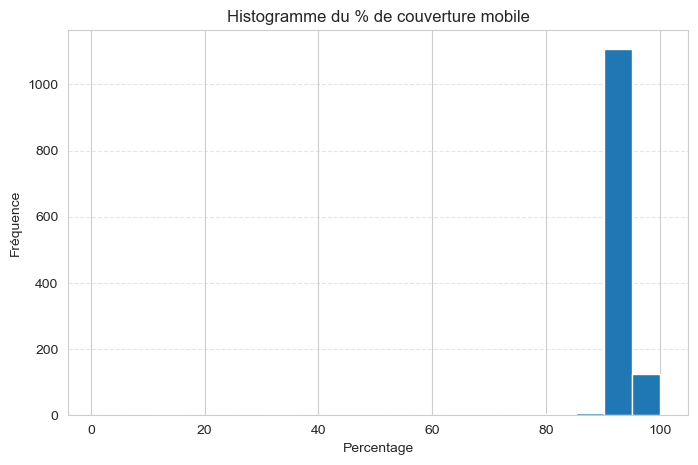

In [17]:
# 3.1 Statistiques descriptives de la variable cible ‘Percentage’
desc = df['Percentage'].describe()
print("Statistiques descriptives de Percentage :\n", desc)

# 3.2 Histogramme de distribution du pourcentage de couverture mobile
plt.figure(figsize=(8, 5))
df['Percentage'].hist(bins=20)
plt.title('Histogramme du % de couverture mobile')
plt.xlabel('Percentage')
plt.ylabel('Fréquence')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()